In [ ]:
#Utilities: All imports must be specified here
#!pip install pandas-profiling==2.9.0
#!pip install bioinfokit==0.9.8
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler
import pandas_profiling
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from bioinfokit.visuz import cluster
import matplotlib.font_manager
from sklearn.model_selection import train_test_split
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


In [ ]:
#Read the train data
train_data = pd.read_csv('./training.csv')
train_data = train_data.replace(-999.000,np.nan)
train_data

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,0.879,1.414,NaN,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,3.776,1.414,NaN,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,2.354,-1.285,NaN,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,1.056,-1.385,NaN,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,NaN,71.989,36.548,5.042,NaN,NaN,NaN,1.392,5.042,55.892,1.258,-1.414,NaN,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,4.505083,b
249996,349996,NaN,58.179,68.083,22.439,NaN,NaN,NaN,2.585,22.439,50.618,1.162,-1.345,NaN,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,NaN,NaN,NaN,2.390,22.183,120.462,1.202,0.529,NaN,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,NaN,NaN,NaN,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,NaN,NaN,NaN,3.365,13.504,55.859,0.999,1.414,NaN,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.681611,b


In [ ]:
#Split the 250K samples for training and validation
labels = train_data['Label']
FeatureMatrix = train_data
FeatureMatrix = FeatureMatrix.drop(['EventId'], axis=1)
FeatureMatrix = FeatureMatrix.drop(['Label'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(FeatureMatrix, labels, test_size=0.2, random_state=42)
train_weights = X_train['Weight'].values
val_weights = X_val['Weight'].values
X_train = X_train.drop(['Weight'], axis=1)
X_val = X_val.drop(['Weight'], axis=1)

print(X_train.shape)
print(X_val.shape)

(200000, 30)
(50000, 30)


In [ ]:
#Exploratory Data analysis - 1: Check if the data is balanced
#To find the number of signal and background events
print(y_train.value_counts())
rcParams['figure.figsize'] = 10,5
sb.barplot(x = y_train.value_counts().index, y = y_train.value_counts().values)
plt.title('Number of events in each class (Signal and Background)')
plt.show()

#use LabelEncoder to enumerate the labels
train_data['Label'] = LabelEncoder().fit_transform(train_data['Label'])
train_data.head()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

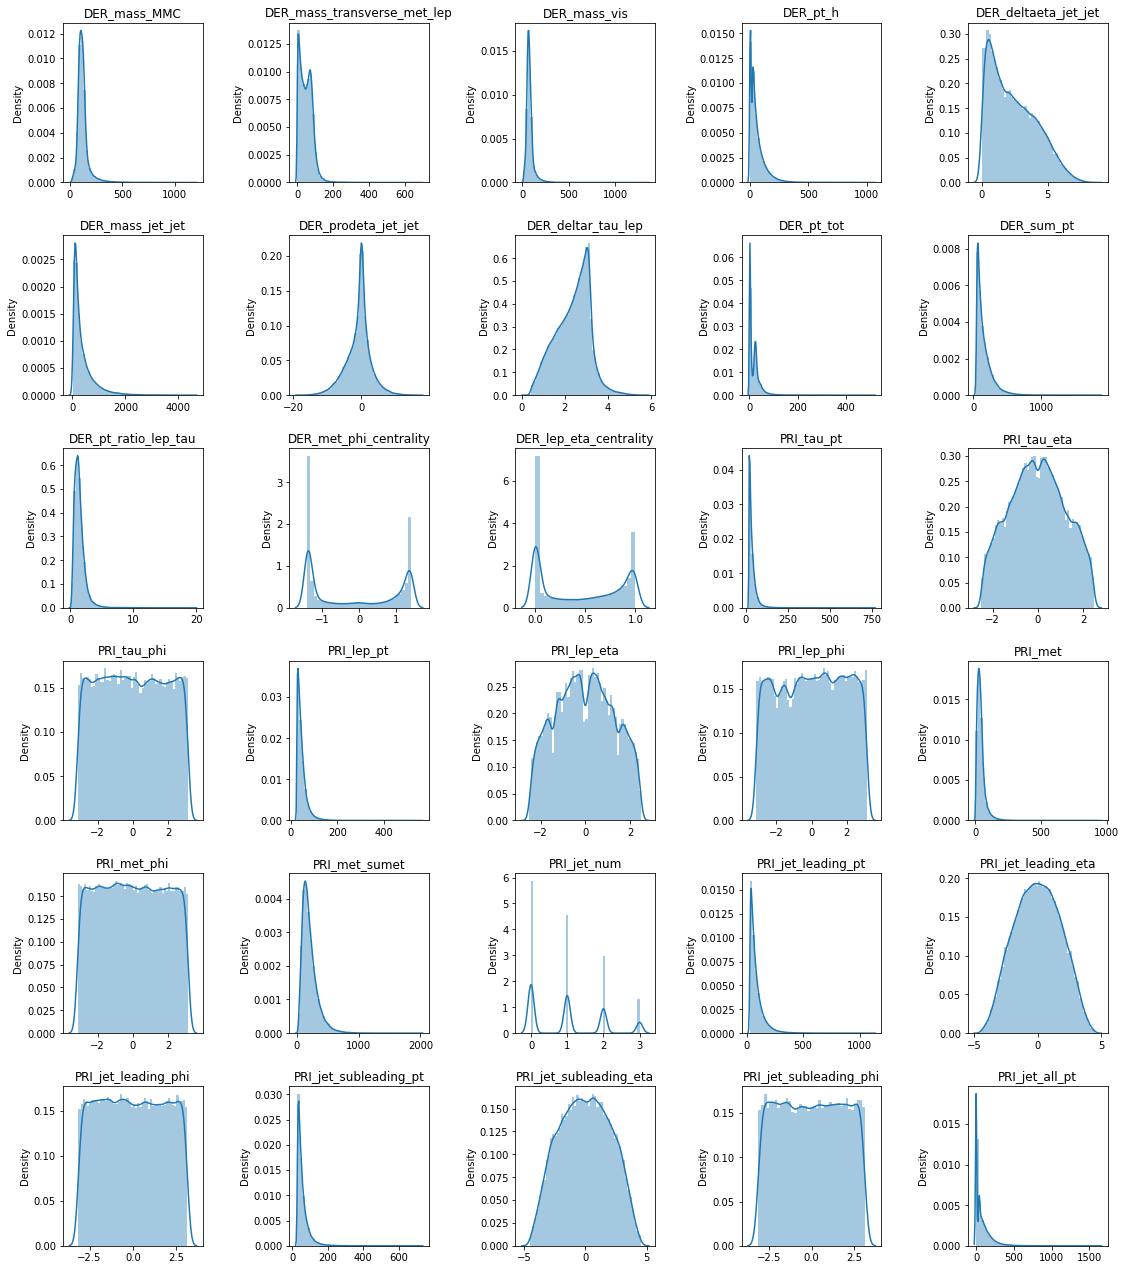

In [ ]:
#Exploratory data Analysis - 2: Visualize the distribution of all the features
fig, ax = plt.subplots(6,5, figsize=(16, 18))
ax = ax.flatten()
for i in range(30):
    sb.distplot(X_train.iloc[:,i].values, ax=ax[i])
    ax[i].set_title(X_train.columns[i])
fig.tight_layout(pad=2.0)  

In [ ]:
#Exploratory data analysis -3: Using Pandas profiling
profile = pandas_profiling.ProfileReport(X_train)
profile.to_file("./EDA_final.html")

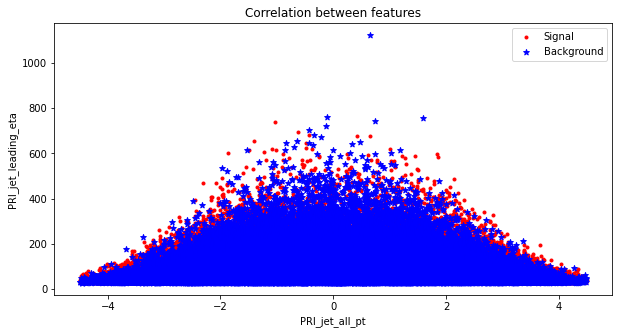

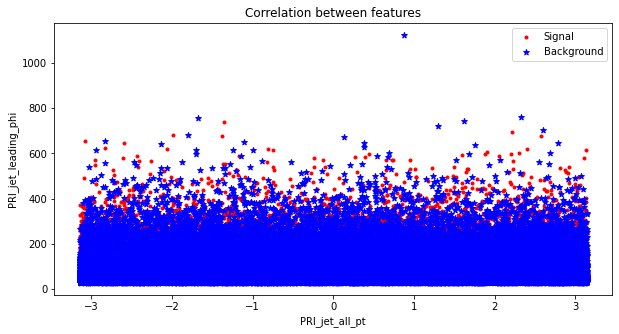

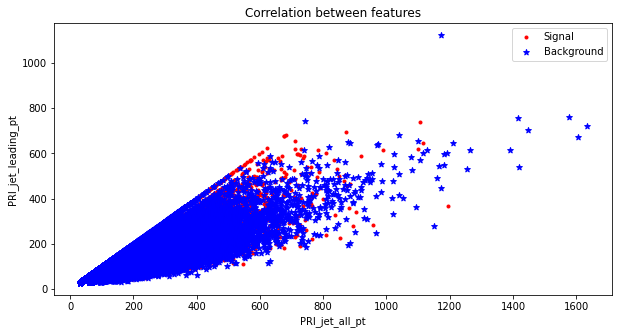

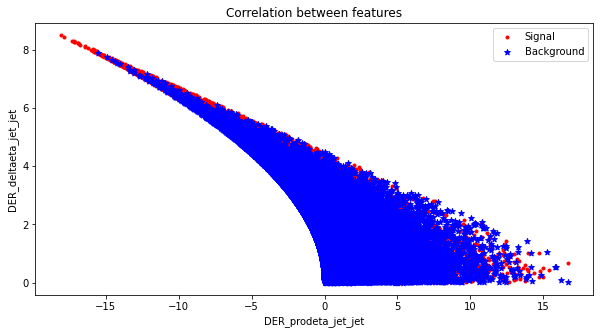

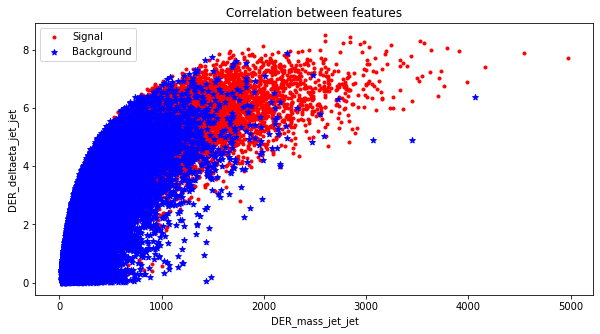

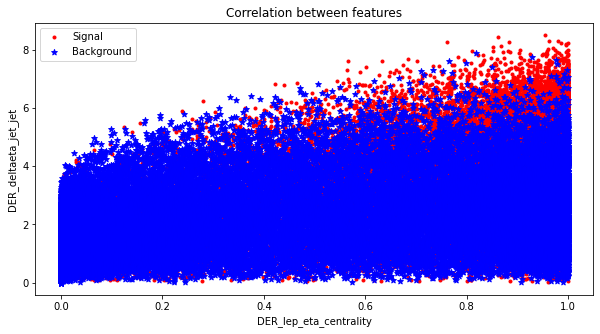

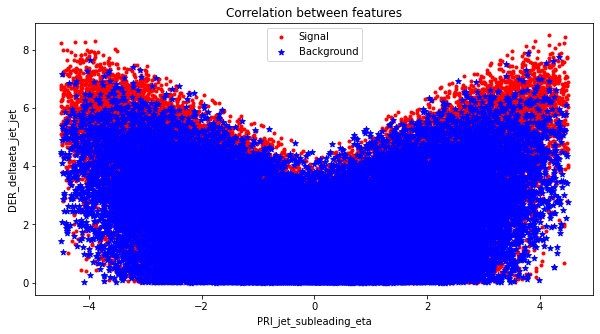

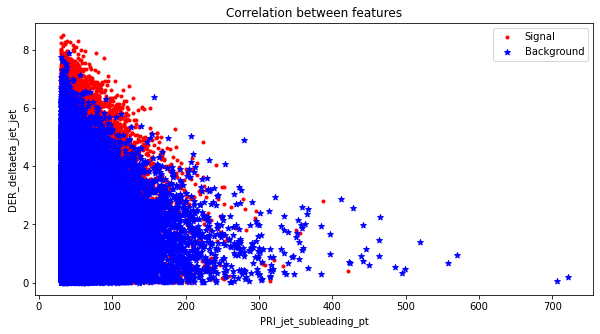

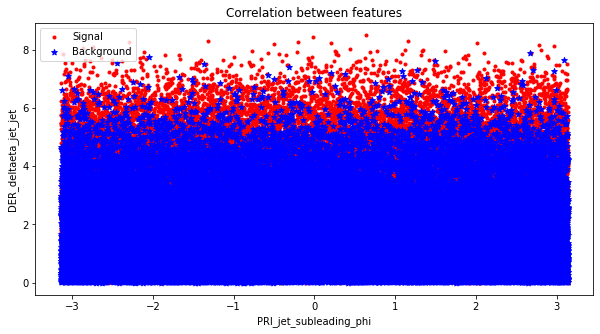

In [ ]:
#Exploratory Data Analysis-4: Visualize correlations between features
#1) PRI_jet_leading_pt vs PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt

labels = train_data['Label'].values
PRI_jet_leading_pt = train_data['PRI_jet_leading_pt'].values
PRI_jet_leading_eta = train_data['PRI_jet_leading_eta'].values
PRI_jet_leading_phi = train_data['PRI_jet_leading_phi'].values
PRI_jet_all_pt = train_data['PRI_jet_all_pt'].values

PRI_jet_leading_pt[PRI_jet_leading_pt == -999] = 0
PRI_jet_leading_eta[PRI_jet_leading_eta == -999] = 0
PRI_jet_leading_phi[PRI_jet_leading_phi == -999] = 0
PRI_jet_all_pt[PRI_jet_all_pt == -999] = 0

class1_idx = np.where(labels == 's')
class2_idx = np.where(labels =='b')

PRI_jet_leading_eta_s = PRI_jet_leading_eta[class1_idx]
PRI_jet_leading_eta_b = PRI_jet_leading_eta[class2_idx]

PRI_jet_leading_phi_s = PRI_jet_leading_phi[class1_idx]
PRI_jet_leading_phi_b = PRI_jet_leading_phi[class2_idx]

PRI_jet_all_pt_s = PRI_jet_all_pt[class1_idx]
PRI_jet_all_pt_b = PRI_jet_all_pt[class2_idx]

y1 = PRI_jet_leading_pt[class1_idx]
y2 = PRI_jet_leading_pt[class2_idx]

plt.scatter(PRI_jet_leading_eta_s,y1,c='r', marker='.', label='Signal')
plt.scatter(PRI_jet_leading_eta_b,y2,c='b', marker='*', label='Background')
plt.title('Correlation between features')
plt.xlabel('PRI_jet_all_pt')
plt.ylabel('PRI_jet_leading_eta')
plt.legend()
plt.show()

plt.scatter(PRI_jet_leading_phi_s,y1,c='r', marker='.', label='Signal')
plt.scatter(PRI_jet_leading_phi_b,y2,c='b', marker='*', label='Background')
plt.title('Correlation between features')
plt.xlabel('PRI_jet_all_pt')
plt.ylabel('PRI_jet_leading_phi')
plt.legend()
plt.show()

plt.scatter(PRI_jet_all_pt_s,y1,c='r', marker='.', label='Signal')
plt.scatter(PRI_jet_all_pt_b,y2,c='b', marker='*', label='Background')
plt.title('Correlation between features')
plt.xlabel('PRI_jet_all_pt')
plt.ylabel('PRI_jet_leading_pt')
plt.legend()
plt.show()

#2) DER_deltaeta_jet_jet vs DER_prodeta_jet_jet, DER_mass_jet_jet, DER_lep_eta_centrality, PRI_jet_subleading_eta, PRI_jet_subleading_pt, PRI_jet_subleading_phi
labels = train_data['Label'].values
DER_deltaeta_jet_jet = train_data['DER_deltaeta_jet_jet'].values
DER_prodeta_jet_jet = train_data['DER_prodeta_jet_jet'].values
DER_mass_jet_jet = train_data['DER_mass_jet_jet'].values
DER_lep_eta_centrality = train_data['DER_lep_eta_centrality'].values

PRI_jet_subleading_eta = train_data['PRI_jet_subleading_eta'].values
PRI_jet_subleading_pt = train_data['PRI_jet_subleading_pt'].values
PRI_jet_subleading_phi = train_data['PRI_jet_subleading_phi'].values

DER_deltaeta_jet_jet[DER_deltaeta_jet_jet == -999] = 0

DER_prodeta_jet_jet[DER_prodeta_jet_jet == -999] = 0
DER_mass_jet_jet[DER_mass_jet_jet == -999] = 0
DER_lep_eta_centrality[DER_lep_eta_centrality == -999] = 0

PRI_jet_subleading_eta[PRI_jet_subleading_eta == -999] = 0
PRI_jet_subleading_pt[PRI_jet_subleading_pt == -999] = 0
PRI_jet_subleading_phi[PRI_jet_subleading_phi == -999] = 0


class1_idx = np.where(labels == 's')
class2_idx = np.where(labels =='b')
y1 = DER_deltaeta_jet_jet[class1_idx]
y2 = DER_deltaeta_jet_jet[class2_idx]

DER_prodeta_jet_jet_s = DER_prodeta_jet_jet[class1_idx]
DER_prodeta_jet_jet_b = DER_prodeta_jet_jet[class2_idx]

DER_mass_jet_jet_s = DER_mass_jet_jet[class1_idx]
DER_mass_jet_jet_b = DER_mass_jet_jet[class2_idx]

DER_lep_eta_centrality_s = DER_lep_eta_centrality[class1_idx]
DER_lep_eta_centrality_b = DER_lep_eta_centrality[class2_idx]


PRI_jet_subleading_eta_s = PRI_jet_subleading_eta[class1_idx]
PRI_jet_subleading_eta_b = PRI_jet_subleading_eta[class2_idx]

PRI_jet_subleading_pt_s = PRI_jet_subleading_pt[class1_idx]
PRI_jet_subleading_pt_b = PRI_jet_subleading_pt[class2_idx]

PRI_jet_subleading_phi_s = PRI_jet_subleading_phi[class1_idx]
PRI_jet_subleading_phi_b = PRI_jet_subleading_phi[class2_idx]

plt.scatter(DER_prodeta_jet_jet_s,y1,c='r', marker='.', label='Signal')
plt.scatter(DER_prodeta_jet_jet_b,y2,c='b', marker='*', label='Background')
plt.title('Correlation between features')
plt.xlabel('DER_prodeta_jet_jet')
plt.ylabel('DER_deltaeta_jet_jet')
plt.legend()
plt.show()

plt.scatter(DER_mass_jet_jet_s,y1,c='r', marker='.', label='Signal')
plt.scatter(DER_mass_jet_jet_b,y2,c='b', marker='*', label='Background')
plt.title('Correlation between features')
plt.xlabel('DER_mass_jet_jet')
plt.ylabel('DER_deltaeta_jet_jet')
plt.legend()
plt.show()

plt.scatter(DER_lep_eta_centrality_s,y1,c='r', marker='.', label='Signal')
plt.scatter(DER_lep_eta_centrality_b,y2,c='b', marker='*', label='Background')
plt.title('Correlation between features')
plt.xlabel('DER_lep_eta_centrality')
plt.ylabel('DER_deltaeta_jet_jet')
plt.legend()
plt.show()

plt.scatter(PRI_jet_subleading_eta_s,y1,c='r', marker='.', label='Signal')
plt.scatter(PRI_jet_subleading_eta_b,y2,c='b', marker='*', label='Background')
plt.title('Correlation between features')
plt.xlabel('PRI_jet_subleading_eta')
plt.ylabel('DER_deltaeta_jet_jet')
plt.legend()
plt.show()

plt.scatter(PRI_jet_subleading_pt_s,y1,c='r', marker='.', label='Signal')
plt.scatter(PRI_jet_subleading_pt_b,y2,c='b', marker='*', label='Background')
plt.title('Correlation between features')
plt.xlabel('PRI_jet_subleading_pt')
plt.ylabel('DER_deltaeta_jet_jet')
plt.legend()
plt.show()

plt.scatter(PRI_jet_subleading_phi_s,y1,c='r', marker='.', label='Signal')
plt.scatter(PRI_jet_subleading_phi_b,y2,c='b', marker='*', label='Background')
plt.title('Correlation between features')
plt.xlabel('PRI_jet_subleading_phi')
plt.ylabel('DER_deltaeta_jet_jet')
plt.legend()
plt.show()




In [ ]:
#log transform
der_pt_tot = train_preprocessed_step1['DER_pt_tot'].values
logtransformed = np.log(der_pt_tot)

fig, ax = plt.subplots(2,1, figsize=(16, 18))
ax = ax.flatten()
sb.distplot(der_pt_tot, ax=ax[0])
ax[0].set_title(der_pt_tot)

sb.distplot(logtransformed, ax=ax[1])
ax[1].set_title(logtransformed)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with sim

Text(0.5, 1.0, '[-2.5794183          nan -0.60084675 ...         nan         nan\n         nan]')

In [ ]:
#Preprocessing 
#Parameters should be N*30 feature matrix
def PreProcessing(trainset, valtest):
  #Separate PRI_jet_num and DER_mass_MMC from the data to preprocess separately
  jet_num_train =  trainset['PRI_jet_num'].values
  jet_num_val = valtest['PRI_jet_num'].values

  der_mass_train = trainset['DER_mass_MMC'].values
  der_mass_val = valtest['DER_mass_MMC'].values

  X_train_dropped = trainset.drop(['PRI_jet_num'], axis=1)
  X_train_dropped = X_train_dropped.drop(['DER_mass_MMC'], axis=1)
  X_val_dropped = valtest.drop(['PRI_jet_num'], axis=1)
  X_val_dropped = X_val_dropped.drop(['DER_mass_MMC'], axis=1)

  #Step1: Standardize the data by ignoring NaN values to 28 features and assign 0 to all NaN values.
  std = StandardScaler()
  train_preprocessed = std.fit_transform(X_train_dropped)
  val_preprocessed = std.transform(X_val_dropped)
  train_preprocessed_step1 = pd.DataFrame(train_preprocessed, columns = X_train_dropped.columns.values).replace(np.nan, 0)
  val_preprocessed_step1 = pd.DataFrame(val_preprocessed, columns = X_val_dropped.columns.values).replace(np.nan, 0)

  #Step2: Use one hot encoding for jet_num variable
  one_hot_encoder = OneHotEncoder()
  train_preprocessed_step2 = one_hot_encoder.fit_transform(jet_num_train.reshape(-1,1))
  val_preprocessed_step2 = one_hot_encoder.transform(jet_num_val.reshape(-1,1))
  train_preprocessed_step2 = pd.DataFrame(train_preprocessed_step2.toarray(), columns = ['PRI_jet_num_0', 'PRI_jet_num_1', 'PRI_jet_num_2', 'PRI_jet_num_3' ])
  val_preprocessed_step2 = pd.DataFrame(val_preprocessed_step2.toarray(), columns = ['PRI_jet_num_0', 'PRI_jet_num_1', 'PRI_jet_num_2', 'PRI_jet_num_3' ])


  #Step3: Mean imputation on DER_mas_MMC
  imp = SimpleImputer(missing_values=np.nan, strategy='mean')
  mass_imputation_train = imp.fit_transform(der_mass_train.reshape(-1,1))
  mass_imputation_val = imp.transform(der_mass_val.reshape(-1,1))
  mass_preprocessed_train = std.fit_transform(mass_imputation_train)
  mass_preprocessed_val = std.transform(mass_imputation_val)
  mass_preprocessed_train = pd.DataFrame(mass_preprocessed_train, columns = ['DER_mass_MMC'])
  mass_preprocessed_val = pd.DataFrame(mass_preprocessed_val, columns = ['DER_mass_MMC'])

  #Label encoder
  labelenc = LabelEncoder()
  y_train_enc = labelenc.fit_transform(y_train)
  y_val_enc = labelenc.transform(y_val)


  #Concatenate all the features
  train_preprocessed_final = pd.concat([train_preprocessed_step1, train_preprocessed_step2, mass_preprocessed_train], axis=1, sort=False)
  val_preprocessed_final = pd.concat([val_preprocessed_step1, val_preprocessed_step2, mass_preprocessed_val], axis=1, sort=False)

  return train_preprocessed_final, val_preprocessed_final

train_preprocessed_final, val_preprocessed_final = PreProcessing(X_train, X_val)

#Label encoder
labelenc = LabelEncoder()
y_train_enc = labelenc.fit_transform(y_train)
y_val_enc = labelenc.transform(y_val)


In [ ]:
#Feature Dimensionality Adjustment- Analysis using PCA
def DimensionalityReduction(train_preprocessed, valtest_preprocessed):
  pca_model = PCA()
  pca_out = pca_model.fit(train_preprocessed)
  #print("Variance Ratio:", pca_model.explained_variance_ratio_)

  num_pc = pca_out.n_features_
  pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
  #Eigen values for all the principal components
  #print(pca_model.explained_variance_)
  cluster.screeplot(obj=[pc_list, pca_model.explained_variance_ratio_])

  #PCA scatter plot - biplot
  pca_components = pca_model.components_
  cluster.pcaplot(x=pca_components[0], y=pca_components[1],labels=FeatureMatrix.columns.values, var1=round(pca_model.explained_variance_ratio_[0]*100, 2),var2=round(pca_model.explained_variance_ratio_[1]*100, 2))
  cluster.pcaplot(x=pca_components[0], y=pca_components[1], z=pca_components[2],labels=FeatureMatrix.columns.values, var1=round(pca_model.explained_variance_ratio_[0]*100, 2),var2=round(pca_model.explained_variance_ratio_[1]*100, 2), var3=round(pca_model.explained_variance_ratio_[2]*100, 2))


  #Apply Dimensionality Reduction: PCA
  pca = PCA(n_components=15)
  PCATrain = pca.fit_transform(train_preprocessed)
  PCAval = pca.transform(valtest_preprocessed)
  return PCATrain, PCAval

PCAtrain, PCAVal = DimensionalityReduction(train_preprocessed_final, val_preprocessed_final)



findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


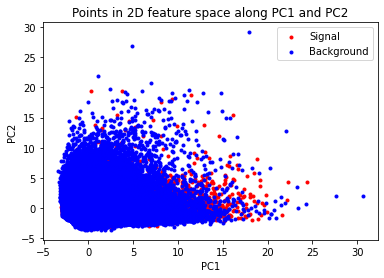

In [ ]:
#Plot all the points in first 2 PCs
class1_idx = np.where(y_train == 's')
class2_idx = np.where(y_train =='b')
x = PCAtrain[:,0]
y  = PCAtrain[:,1]
x_s = x[class1_idx]
x_b = x[class2_idx]

y_s = y[class1_idx]
y_b = y[class2_idx]

plt.scatter(x_s,y_s,c='r', marker='.', label='Signal')
plt.scatter(x_b,y_b,c='b', marker='.', label='Background')
plt.title('Points in 2D feature space along PC1 and PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [ ]:
#Code to calculate AMS score on train and validationset
def AMS(cum_weights, data_weights, y, pred ):
  data_weights = data_weights * cum_weights / sum(data_weights)
  s = data_weights * (y == 1) * (pred == 1)
  b = data_weights * (y == 0) * (pred == 1)
  signal = np.sum(s)
  background = np.sum(b)
  br = 10.0
  AMS_val = math.sqrt(2 * ((signal + background + 10) * math.log(1.0 + signal/(background + 10)) - signal))
  return AMS_val


In [ ]:
def evaluation(pred_train, true_labels_train, pred_val, true_labels_val, sum_weights, train_weights, val_weights):
  fpr, tpr, thresholds = metrics.roc_curve(true_labels_val, pred_val)
  fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(true_labels_train, pred_train)
  auc_val = metrics.auc(fpr, tpr)
  auc_train = metrics.auc(fpr_tr, tpr_tr)
  sum_weights = sum(train_weights)+sum(val_weights)
  AMS_score_val  = AMS(sum_weights, val_weights, true_labels_val, pred_val)
  AMS_score_tr  = AMS(sum_weights, train_weights, true_labels_train, pred_train)

  return auc_val, auc_train, AMS_score_val, AMS_score_tr 



In [ ]:
#Training: Baseline - Naive Bayes
naive_bayes = GaussianNB()
nb= naive_bayes.fit(PCAtrain, y_train_enc)
predictions_nb = nb.predict(PCAVal)
predictions_nb_tr = nb.predict(PCAtrain)

fpr, tpr, thresholds = metrics.roc_curve(y_val_enc, predictions_nb)
fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train_enc, predictions_nb_tr)

sum_weights= sum(train_weights) + sum(val_weights)
auc_nb = metrics.auc(fpr, tpr)
auc__nb_tr = metrics.auc(fpr_tr, tpr_tr)
AMS_score  = AMS(sum_weights, val_weights, y_val_enc, predictions_nb)
AMS_score_tr  = AMS(sum_weights, train_weights, y_train_enc, predictions_nb_tr)

print("Gaussian Naive Bayes: AUC-validation  - ", auc_nb)  
print("Gaussian Naive Bayes: AUC-Train  - ", auc__nb_tr) 
print("Gaussian Naive Bayes: AMS-Val  - ", AMS_score) 
print("Gaussian Naive Bayes: AMS-train  - ", AMS_score_tr) 
print("====================================================================\n")



Gaussian Naive Bayes: AUC-validation  -  0.6740684297791196
Gaussian Naive Bayes: AUC-Train  -  0.6695321461020571
Gaussian Naive Bayes: AMS-Val  -  1.4047850954354357
Gaussian Naive Bayes: AMS-train  -  1.3928483075655378



In [ ]:
#Training and Parameter Tuning: Model 1 - Logistic Regression

inv_reg = [0.001, 0.005, 0.008, 0.01, 0.03, 0.05, 0.08, 0.1 ]
auc_val_list = []
auc_train_list = []
#for i in inv_reg:
logistic_reg = LogisticRegression(random_state=0, max_iter= 100, C = 0.01, solver='saga').fit(PCAtrain, y_train_enc)
predictions = logistic_reg.predict(PCAVal)
prediction_tr = logistic_reg.predict(PCAtrain)

sum_weights = sum(train_weights) + sum(val_weights)
auc_val, auc_train, AMS_score_val, AMS_score_tr  = evaluation(prediction_tr, y_train_enc, predictions, y_val_enc, sum_weights, train_weights, val_weights)
#auc_val_list.append(auc_val)
#auc_train_list.append(auc_train)

  
#plt.plot(inv_reg, auc_train_list, c='b',label='Train')
#plt.plot(inv_reg, auc_val_list, c='r',label='Validation')
#plt.legend()
#plt.xlabel("Inverse of Regularization")
#plt.ylabel("AUC score")
#plt.title("Model Selection for Logistic Regression")
#plt.show()


print("Logistic Regression: AUC-validation  - ", auc_val)  
print("Logistic Regression: AUC-Train  - ", auc_train)
print("Logistic Regression: AMS-Val  - ", AMS_score_val) 
print("Logistic Regression: AMS-train  - ", AMS_score_tr) 
print("====================================================================\n")




Logistic Regression: AUC-validation  -  0.6506197297456213
Logistic Regression: AUC-Train  -  0.6515311799603597
Logistic Regression: AMS-Val  -  1.3418688964972536
Logistic Regression: AMS-train  -  1.390838457040062



In [ ]:
#Training: Model 3 - Decision trees
#max_depth = [2,3,5,6,7,8,9,10,15,20,30,40,50,100]
#aucval_list = []
#auctrain_list = []
#for i in max_depth:
max_features = 'sqrt'
dec_tree = DecisionTreeClassifier(max_depth = 10, max_features= 5, random_state=0)
tree_classifier = dec_tree.fit(train_preprocessed_final, y_train_enc)
prediction_dectree = tree_classifier.predict(val_preprocessed_final)
predictions_dectree_tr = tree_classifier.predict(train_preprocessed_final)

sum_weights = sum(train_weights) + sum(val_weights)
auc_val, auc_train, AMS_score_val, AMS_score_tr  = evaluation(predictions_dectree_tr, y_train_enc, prediction_dectree, y_val_enc, sum_weights, train_weights, val_weights)
#aucval_list.append(auc_val)
#auctrain_list.append(auc_train)

#plt.plot(max_depth, auctrain_list, c='b',label='Train')
#plt.plot(max_depth, aucval_list, c='r',label='Validation')
#plt.legend()
#plt.xlabel("Number of terminal nodes")
#plt.ylabel("AMS score")
#plt.title("Model Selection")
#plt.show()


print("Decision Tree: AUC-validation  - ", auc_val)  
print("Decision Tree: AUC-Train  - ", auc_train) 
print("Decision Tree: AMS-Val  - ", AMS_score_val) 
print("Decision Tree: AMS-train  - ", AMS_score_tr) 
print("====================================================================\n")




Decision Tree: AUC-validation  -  0.7728809967179997
Decision Tree: AUC-Train  -  0.7835764841750694
Decision Tree: AMS-Val  -  2.4272226577250295
Decision Tree: AMS-train  -  2.5831887167929253



In [ ]:
#Training: Model 4 - Random Forest
#max_depth = [5,8,12,15,25,50,80]
auc_val_list = []
auc_train_list = []
#for i in max_depth:
RFModel = RandomForestClassifier(n_estimators = 250, max_depth=12, max_features = 5, random_state = 0)
rf= RFModel.fit(train_preprocessed_final, y_train_enc)
predictions_rf = rf.predict(val_preprocessed_final)
predictions_rf_tr = rf.predict(train_preprocessed_final)

sum_weights = sum(train_weights) + sum(val_weights)
auc_val, auc_train, AMS_score_val, AMS_score_tr  = evaluation(predictions_rf_tr, y_train_enc, predictions_rf, y_val_enc, sum_weights, train_weights, val_weights)
#auc_val_list.append(auc_val)
#auc_train_list.append(auc_train)


#plt.plot(max_depth, auc_train_list, c='b',label='Train')
#plt.plot(max_depth, auc_val_list, c='r',label='Validation')
#plt.legend()
#plt.xlabel("Maximum depth of each learner")
#plt.ylabel("AUC score")
#plt.title("Model Selection for Random Forest")
#plt.show()
print("Random Forest: AUC-validation  - ", auc_val)
print("Random Forest: AUC-Train  - ", auc_train) 
print("Random Forest: AMS-Val  - ", AMS_score_val) 
print("Random Forest: AMS-train  - ", AMS_score_tr) 
print("====================================================================\n")



Random Forest: AUC-validation  -  0.8028019266342953
Random Forest: AUC-Train  -  0.8271576979847566
Random Forest: AMS-Val  -  2.828525007389265
Random Forest: AMS-train  -  3.2361148502754604



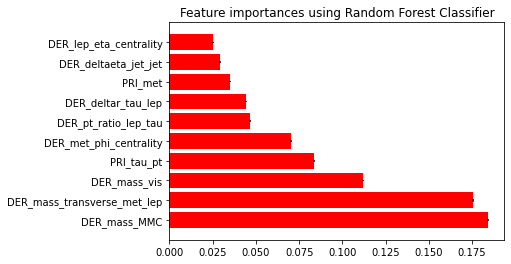

In [ ]:
#Feature Importance using Radon Forest - This code is taken and modified from sklean's official websit (https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0) 
indices = np.argsort(importances)[::-1]
feature_names = train_preprocessed_final.columns.values
rank = feature_names[indices]

imp  = importances[indices]
rank10 = rank[0:10:,]
imp10 = imp[0:10:,]
std_sort = std[indices]
std10 = std_sort[0:10:,]

plt.figure()
plt.title("Feature importances using Random Forest Classifier")
plt.barh(range(10), imp10, color="r", yerr=std10, align="center")
plt.yticks(range(10),rank10)
plt.ylim([-1, 10])
plt.show()


In [ ]:
#Training: Model 4 - AdaBoost
#n_estimators = [10, 20, 40, 50, 80, 100, 200, 250, 300]
#learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 2, 3]
auc_val_list = []
auc_train_list= []

#for i in learning_rate:
adaboost = AdaBoostClassifier(n_estimators = 250, learning_rate = 0.5, random_state = 0)
ada= adaboost.fit(train_preprocessed_final, y_train_enc)
predictions_ada = ada.predict(val_preprocessed_final)
predictions_ada_tr = ada.predict(train_preprocessed_final)

sum_weights = sum(train_weights) + sum(val_weights)
auc_val, auc_train, AMS_score_val, AMS_score_tr  = evaluation(predictions_ada_tr, y_train_enc, predictions_ada, y_val_enc, sum_weights, train_weights, val_weights)
#auc_val_list.append(auc_val)
#auc_train_list.append(auc_train)

#plt.plot(learning_rate, auc_train_list, c='b',label='Train')
#plt.plot(learning_rate, auc_val_list, c='r',label='Validation')
#plt.legend()
#plt.xlabel("Learning rate")
#plt.ylabel("AUC score")
#plt.title("Model Selection for AdaBoost")
#plt.show()

print("Ada Boost: AUC-validation  - ", auc_val)
print("Ada Boost: AUC-Train  - ", auc_train)
print("Ada Boost: AMS-Val  - ", AMS_score_val) 
print("Adaboost: AMS-train  - ", AMS_score_tr)
print("====================================================================\n")



Ada Boost: AUC-validation  -  0.7910220186585271
Ada Boost: AUC-Train  -  0.7914820281873607
Ada Boost: AMS-Val  -  2.5371113664692806
Adaboost: AMS-train  -  2.5938800185282216



In [ ]:
#Training: Model 5 - GradientBoost
#_estimators = [20,50,75,100,200,300, 400, 500]
#learning_rate = [0.01, 0.1, 0.3, 0.5, 1, 2]
#auc_val_list = []
#auc_train_list = []
#for i in learning_rate:
gradient_boost = GradientBoostingClassifier(loss = 'exponential', learning_rate= 0.5,  n_estimators= 150, subsample = 0.8, max_depth = 3, max_features = 6, random_state=0)
gbm= gradient_boost.fit(train_preprocessed_final, y_train_enc)
predictions_gbm = gbm.predict(val_preprocessed_final)
predictions_gbm_tr = gbm.predict(train_preprocessed_final)

sum_weights = sum(train_weights) + sum(val_weights)
auc_val, auc_train, AMS_score_val, AMS_score_tr  = evaluation(predictions_gbm_tr, y_train_enc, predictions_gbm, y_val_enc, sum_weights, train_weights, val_weights)
#auc_val_list.append(auc_val)
#auc_train_list.append(auc_train)

#plt.plot(learning_rate, auc_train_list, c='b',label='Train')
#plt.plot(learning_rate, auc_val_list, c='r',label='Validation')
#plt.legend()
#plt.xlabel("Learning Rate")
#plt.ylabel("AUC score")
#plt.title("Model Selection for Gradient Boost")
#plt.show()

print("Gradient Boost: AUC-validation  - ", auc_val)
print("Gradient Boost: AUC-Train  - ", auc_train)
print("Gradient Boost: AMS-Val  - ", AMS_score_val) 
print("Gradient Boost: AMS-train  - ", AMS_score_tr)
print("====================================================================\n")





Gradient Boost: AUC-validation  -  0.8065099471471653
Gradient Boost: AUC-Train  -  0.813137315899498
Gradient Boost: AMS-Val  -  2.726944282422905
Gradient Boost: AMS-train  -  2.8490609003638454



In [ ]:
#Defining base models
l0 = list()
l0.append(('Classification Tree', DecisionTreeClassifier(max_depth = 10)))
l0.append(('RandForest', RandomForestClassifier(max_depth = 8)))
l0.append(('AdaBoost', AdaBoostClassifier()))
l0.append(('GradBoost', GradientBoostingClassifier(max_depth = 3)))

#Defining Meta learner
l1 = LogisticRegression()
stacked_model = StackingClassifier(estimators=l0, final_estimator=l1, cv=5)
stack = stacked_model.fit(train_preprocessed_final, y_train_enc)

stack_val = stack.predict(val_preprocessed_final)
stack_train = stack.predict(train_preprocessed_final)

sum_weights = sum(train_weights) + sum(val_weights)
auc_val, auc_train, AMS_score_val, AMS_score_tr  = evaluation(stack_train, y_train_enc, stack_val, y_val_enc, sum_weights, train_weights, val_weights)

print("Stacked ML Models: AUC-validation  - ", auc_val)
print("Stacked ML Models: AUC-Train  - ", auc_train)
print("Stacked ML Models: AMS-Val  - ", AMS_score_val) 
print("Stacked ML Models: AMS-train  - ", AMS_score_tr)
print("====================================================================\n")




Stacked ML Models: AUC-validation  -  0.8030958962785945
Stacked ML Models: AUC-Train  -  0.8087104426966129
Stacked ML Models: AMS-Val  -  2.731152959044553
Stacked ML Models: AMS-train  -  2.8659108367877866



In [ ]:
#Defining base models
l0 = list()
l0.append(('AdaBoost', AdaBoostClassifier()))
l0.append(('GradBoost', GradientBoostingClassifier()))

#Defining Meta learner
l1 = LogisticRegression()
stacked_model = StackingClassifier(estimators=l0, final_estimator=l1, cv=5)
stack = stacked_model.fit(train_preprocessed_final, y_train_enc)

stack_val = stack.predict(val_preprocessed_final)
stack_train = stack.predict(train_preprocessed_final)

sum_weights = sum(train_weights) + sum(val_weights)
auc_val, auc_train, AMS_score_val, AMS_score_tr  = evaluation(stack_train, y_train_enc, stack_val, y_val_enc, sum_weights, train_weights, val_weights)

print("Stacked ML Models: AUC-validation  - ", auc_val)
print("Stacked ML Models: AUC-Train  - ", auc_train)
print("Stacked ML Models: AMS-Val  - ", AMS_score_val) 
print("Stacked ML Models: AMS-train  - ", AMS_score_tr)
print("====================================================================\n")

Stacked ML Models: AUC-validation  -  0.8023109235724911
Stacked ML Models: AUC-Train  -  0.8029917115118008
Stacked ML Models: AMS-Val  -  2.731000502700977
Stacked ML Models: AMS-train  -  2.7871558737625137



In [ ]:
#Create a submission file on testdata
test_data = pd.read_csv('./test.csv')
test_data = test_data.replace(-999.000,np.nan)
test_data = test_data.drop(['EventId'], axis=1)
print(test_data.shape)

train_preprocessed_final, test_preprocessed_final = PreProcessing(X_train, test_data)
print(test_preprocessed_final.shape)

pred = ada.predict(test_preprocessed_final)
pred.shape


(550000, 30)
(550000, 33)


(550000,)

In [ ]:
#Create submission file
sub = pd.read_csv('./random_submission.csv')
test_predict = pd.Series(pred)

test_predict = pd.DataFrame({"EventId":sub['EventId'],"RankOrder":sub['RankOrder'],"Class":test_predict})
test_predict = test_predict.replace(1,'s')
test_predict = test_predict.replace(0,'b')
test_predict['RankOrder'] = test_predict['Class'].argsort().argsort() + 1 
test_predict.to_csv("submission_ada.csv",index=False)

